## Staging

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('winequality-red.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [37]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [38]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [39]:
df.drop('quality', axis=1, inplace=True) # Dropping "quality" as it doesn't affect the alcohol%

In [40]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [41]:
from sklearn.model_selection import train_test_split

X = df.drop('alcohol', axis=1) # Dropping "alcohol" to separate it from the other variables
y = df['alcohol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Checking the features to be evaluated against "alcohol"

print(X_train.shape)
print(X_test.shape)
print(X_train.columns)
print(X_test.columns)

(1279, 10)
(320, 10)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates'],
      dtype='object')


## Linear Regression - Veronika

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# SCALED

linearModel = LinearRegression()
linearModel.fit(X_train_scaled, y_train)

yPredLinear = linearModel.predict(X_test_scaled)
mseLinear = mean_squared_error(y_test, yPredLinear)
r2Linear = r2_score(y_test, yPredLinear)


print("Linear Regression MSE:", mseLinear)
print("Linear Regression R2:", r2Linear)

Linear Regression MSE: 0.36575886331548685
Linear Regression R2: 0.7062008191713984


In [45]:
# NONSCALED

linearModelNoScale = LinearRegression()
linearModelNoScale.fit(X_train, y_train)  # Fit on unscaled data

yPredLinearNoScale = linearModelNoScale.predict(X_test)

mseLinearNoScale = mean_squared_error(y_test, yPredLinearNoScale)
r2LinearNoScale = r2_score(y_test, yPredLinearNoScale)


print("Linear Regression MSE with no scaling:", mseLinearNoScale)
print("Linear Regression R2 with no scaling:", r2LinearNoScale)


Linear Regression MSE with no scaling: 0.36575886331548985
Linear Regression R2 with no scaling: 0.7062008191713961


#### Interestingly enough, with and without standard scaling produces the same results (almost)

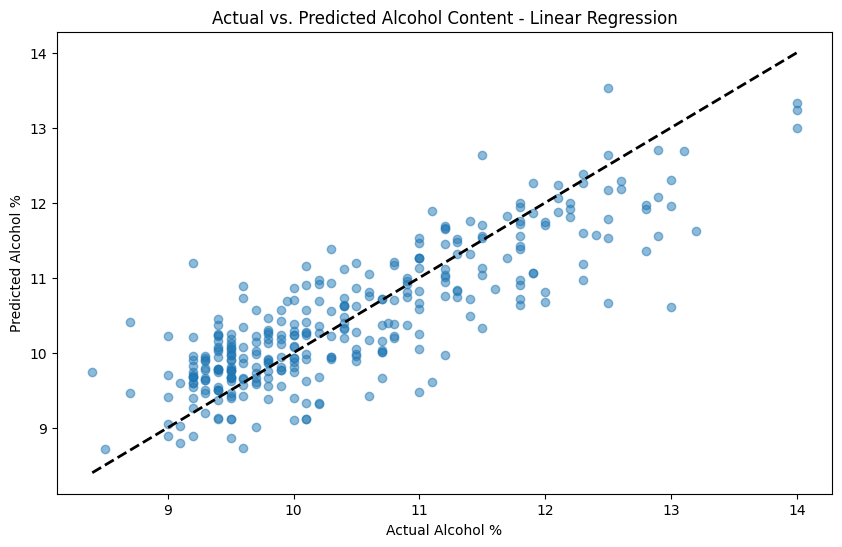

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yPredLinear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel('Actual Alcohol %')
plt.ylabel('Predicted Alcohol %')
plt.title('Actual vs. Predicted Alcohol Content - Linear Regression')
plt.show()

## Schotastic Gradient Descent Regressor - Viktória

In [62]:
from sklearn.linear_model import SGDRegressor

# SCALED

sgdRegressor = SGDRegressor(eta0 = 0.1, random_state=42) 
sgdRegressor.fit(X_train_scaled, y_train)

y_pred = sgdRegressor.predict(X_test_scaled)

mseTestSgdScaled = mean_squared_error(y_test, y_pred)
r2TestSgdScaled = r2_score(y_test, y_pred)

print("Test MSE scaled:", mseTestSgdScaled)
print("Test R2:", r2TestSgdScaled)

Test MSE scaled: 0.3883180868610484
Test R2: 0.6880799147653216


In [63]:
# NONSCALED

sgdRegressorNoScale = SGDRegressor(eta0 = 0.001, random_state=42) 
sgdRegressorNoScale.fit(X_train, y_train)

y_pred = sgdRegressorNoScale.predict(X_test)

mseTestSgdNoScale = mean_squared_error(y_test, y_pred)


print("Test MSE:", mseTestSgdNoScale)

# No need for R2 because MSE score is already incredible as it is 

Test MSE: 1.4239904887197272


In [49]:
from sklearn.model_selection import GridSearchCV # Checking for the best possible eta score

param_grid = [  {'eta0': [0.001, 0.002, 0.01, 0.02]}   ]

sgd_regressor = SGDRegressor()
gridsearch = GridSearchCV(sgd_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

gridsearch.fit(X, y)
gridsearch.best_params_

{'eta0': 0.001}

## Learning curves - Veronika

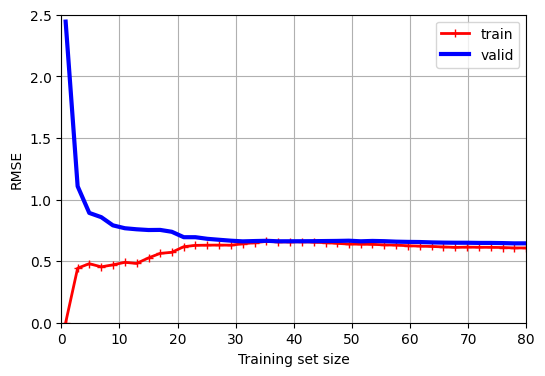

In [50]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(),
                                                         X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
                                                         scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4)) 
plt.plot(train_sizes/X.shape[0]*100, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes/X.shape[0]*100, valid_errors, "b-", linewidth=3, label="valid")


plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])

plt.show()

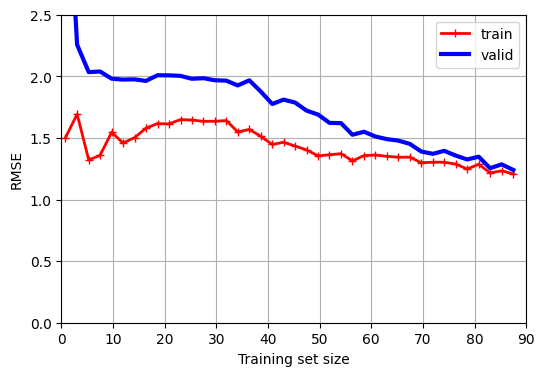

In [51]:
train_sizes, train_scores, valid_scores = learning_curve(SGDRegressor(eta0 = 0.0001),
                                                         X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=8,
                                                         scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4)) 
plt.plot(train_sizes/X.shape[0]*100, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes/X.shape[0]*100, valid_errors, "b-", linewidth=3, label="valid")


plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 90, 0, 2.5])

plt.show()

## Polynomial Regression - Roy

In [52]:
from sklearn.preprocessing import PolynomialFeatures

# SCALED

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

msePoly = mean_squared_error(y_test, y_pred_poly)
r2Poly = r2_score(y_test, y_pred_poly)

print("Polynomial MSE score:", msePoly)
print("Polynomial R2 score:", r2Poly) 


Polynomial MSE score: 0.35288866867037877
Polynomial R2 score: 0.7165389217386516


## Lasso Regression - Roy

In [65]:
from sklearn.linear_model import Lasso

# SCALED

lasso = Lasso(alpha = 0.0001, random_state=42)
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)

mseLasso = mean_squared_error(y_test, y_pred)
r2Lasso = r2_score(y_test, y_pred)

print("Test MSE:", mseLasso)
print("Test R2:", r2Lasso)

Test MSE: 0.36579605624370054
Test R2: 0.706170943608732


In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]

lasso = Lasso()

gridsearch = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

gridsearch.fit(X, y)

gridsearch.best_params_

{'alpha': 0.0001}

In [66]:
lasso.coef_

array([ 0.87699341,  0.06249825,  0.17194365,  0.40275067, -0.08546016,
       -0.02932245, -0.07999626, -1.11695151,  0.579467  ,  0.2197284 ])

## LassoCV Regression - Keita

In [56]:
from sklearn.linear_model import LassoCV

# SCALED

lassoCV = LassoCV(cv=10, random_state=42)
lassoCV.fit(X_train_scaled, y_train)

y_pred = lassoCV.predict(X_test_scaled)

mseLassoCV = mean_squared_error(y_test, y_pred)
r2LassoCV = r2_score(y_test, y_pred)

print("Test MSE:", mseLassoCV)
print("Test R2:", r2LassoCV)
print("Alpha:", lassoCV.alpha_)

Test MSE: 0.3659527452198771
Test R2: 0.7060450817432717
Alpha: 0.0005053576101930851


In [57]:
lassoCV.coef_

array([ 0.87430986,  0.06102387,  0.17108066,  0.40168251, -0.0850336 ,
       -0.02890983, -0.0801204 , -1.11452955,  0.57770911,  0.21880009])

## Polynomial LassoCV Regression - Keita

In [58]:
from sklearn.linear_model import LassoCV


polyLasso = LassoCV(cv=10, random_state=42)
polyLasso.fit(X_train_poly, y_train)

# Predicting on test data with polynomial Lasso model
y_pred_lasso_poly = polyLasso.predict(X_test_poly)

# Calculate metrics for polynomial Lasso regression
mseLassoPoly = mean_squared_error(y_test, y_pred_lasso_poly)
r2LassoPoly = r2_score(y_test, y_pred_lasso_poly)

print("Test MSE:", mseLassoPoly)
print("Test R2:", r2LassoPoly)
print("Best alpha:", polyLasso.alpha_)


Test MSE: 0.327922502832857
Test R2: 0.7365932247431096
Best alpha: 0.005785655540125649


In [59]:
polyLasso.coef_

array([ 7.16244622e-01,  1.80995514e-02,  1.25804451e-01,  6.55620224e-01,
       -0.00000000e+00,  0.00000000e+00, -9.60459117e-02, -1.03013612e+00,
        4.48932156e-01,  2.49371399e-01, -3.84952810e-02,  7.93023567e-02,
        0.00000000e+00,  6.13343476e-02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.55744741e-02, -3.28890464e-02, -4.79110621e-02, -2.59714210e-02,
       -0.00000000e+00, -1.21704059e-02,  8.86815222e-02,  5.89503486e-02,
        0.00000000e+00,  7.02028088e-02,  1.22648283e-02, -3.58233794e-02,
       -5.67297051e-02, -1.64280601e-02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -7.25494705e-02,  4.51459571e-02, -5.27531639e-02,
       -0.00000000e+00, -1.91073464e-02,  5.03676065e-02, -0.00000000e+00,
       -1.31544901e-03,  1.85961158e-02, -0.00000000e+00,  0.00000000e+00,
       -1.02858184e-02, -5.90220544e-03,  0.00000000e+00, -2.33095668e-02,
        8.30578705e-02, -

In [60]:
original_features = [col for col in df.columns if col != 'alcohol']
poly = PolynomialFeatures(degree=2, include_bias=False)

# Only transform the original features, excluding the target variable
poly_features = poly.fit_transform(df[original_features])
feature_names = poly.get_feature_names_out(input_features=original_features)

coefficients = polyLasso.coef_

# Match coefficients to their feature names
feature_coefficients = dict(zip(feature_names, coefficients.flatten()))

for feature, coef in feature_coefficients.items():
    print(f"{feature}: {coef}")

fixed acidity: 0.7162446224409107
volatile acidity: 0.018099551445687877
citric acid: 0.12580445110739918
residual sugar: 0.655620223529969
chlorides: -0.0
free sulfur dioxide: 0.0
total sulfur dioxide: -0.09604591173795397
density: -1.0301361200945363
pH: 0.44893215599468345
sulphates: 0.2493713989363897
fixed acidity^2: -0.03849528104919339
fixed acidity volatile acidity: 0.07930235670617017
fixed acidity citric acid: 0.0
fixed acidity residual sugar: 0.06133434756203903
fixed acidity chlorides: 0.0
fixed acidity free sulfur dioxide: -0.0
fixed acidity total sulfur dioxide: 0.0
fixed acidity density: -0.0
fixed acidity pH: 0.0
fixed acidity sulphates: 0.0
volatile acidity^2: -0.015574474106059664
volatile acidity citric acid: -0.03288904642859831
volatile acidity residual sugar: -0.0479110620912219
volatile acidity chlorides: -0.025971420977713773
volatile acidity free sulfur dioxide: -0.0
volatile acidity total sulfur dioxide: -0.012170405912244536
volatile acidity density: 0.088681

## Summary of scores - Viktória

In [61]:
print("Linear Regression MSE:", mseLinear)
print("Linear Regression R2:", r2Linear)

print("---------")

print("SGD Regressor MSE scaled:", mseTestSgdScaled)
print("SGD Regressor R2 scaled:", r2TestSgdScaled)
print("SGD Regressor MSE non-scaled", mseTestSgdNoScale)

print("---------")

print("Polynomial MSE:", msePoly)
print("Polynomial R2:", r2Poly) 

print("---------")

print("Lasso MSE:", mseLasso)
print("Lasso R2:", r2Lasso)

print("---------")

print("LassoCV MSE:", mseLassoCV)
print("LassoCV R2:", r2LassoCV)

print("---------")

print("Poly LassoCV MSE:", mseLassoPoly)
print("Poly LassoCV R2:", r2LassoPoly)

Linear Regression MSE: 0.36575886331548685
Linear Regression R2: 0.7062008191713984
---------
SGD Regressor MSE scaled: 0.3883180868610484
SGD Regressor R2 scaled: 0.6880799147653216
SGD Regressor MSE non-scaled 1.4239904887197272
---------
Polynomial MSE: 0.35288866867037877
Polynomial R2: 0.7165389217386516
---------
Lasso MSE: 0.36579605624370054
Lasso R2: 0.706170943608732
---------
LassoCV MSE: 0.3659527452198771
LassoCV R2: 0.7060450817432717
---------
Poly LassoCV MSE: 0.327922502832857
Poly LassoCV R2: 0.7365932247431096
